In [6]:
from paraphrase_metrics import ROUGEMetric
import pandas as pd
import numpy as np
import matplotlib.pyplot as vlt

In [3]:
datadir = "../../../data/backtranslate/"
readpath = datadir + "backtranslate.csv"

df = pd.read_csv(readpath, header=None, sep='\t', names=['s', 'p'])

sentences = df['s'].tolist()
paraps = df['p'].tolist()

In [5]:
metric = ROUGEMetric()
scores = metric.eval(sentences, paraps)

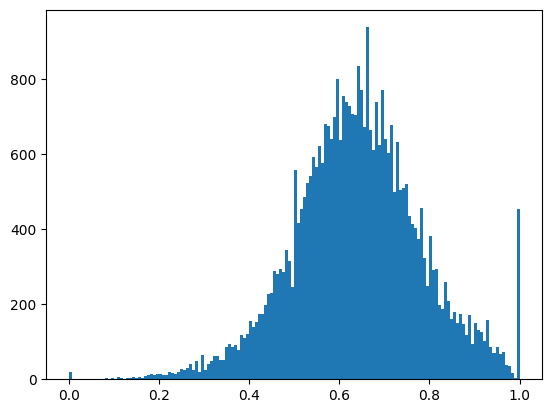

In [8]:
vlt.hist(scores, bins=150)
vlt.show()

In [11]:
sentences_np = np.array(sentences)
paraps_np = np.array(paraps)

zero_ix = np.nonzero(scores == 0)
one_ix = np.nonzero(scores == 1)
zero_pairs = [[sentences_np[i], paraps_np[i]] for i in zero_ix[0]]
one_pairs = [[sentences_np[i], paraps_np[i]] for i in one_ix[0]

for orig, bt in zero_pairs[:10]:
    print("Orig: ", orig)
    print("BT: ", bt)
    print()


Orig:  ['LJOTIČEVCI . . . . . . . . . . . . .'
 'te dvojnosti? . . . . . . . . . . . . . .'
 'raze sožalja, cvetje, sveče in svete maše, g. patru Luki za opravljen obr'
 'Se pravi, da država ne bi mogla vzdrževati profesionalne vojske?'
 '# which fax number to transmit to the receiving station'
 '1. YOU MAY MAKE AND GIVE AWAY VERBATIM COPIES OF THE SOURCE FORM OF THE '
 '2. You may apply bug fixes, portability fixes and other modifications derived from the Public Domain or from the Copyright Holder. A packag'
 'ašami in jo pospremili k večnemu počitku. Posebno zahvalo izrekamo zdravs'
 '......... žena je tajnica pri kongresniku ....................... preden se je poročila s kongresnikom, je bila zaposlena v.................... (ph). Prav tako je v določenem času nadaljevala z razmerjem z uslužbencem poštnega urada v kongresu po imenu ................... (ph) in po poroki s kongresnikom nadaljevala to druženje. Med kongresnikovo nedavno boleznijo, je .................... vztrajal, da s